In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("salary_predict_dataset.csv")

In [5]:
data.head()

,experience,cgpa,Age,Interview_score,Salary
0,1.1,8,22,75,39343
1,1.3,7,23,74,46205
2,1.5,6,22,76,37731
3,2.0,8,24,78,43525
4,2.2,6,28,84,39881


In [6]:
data.describe()

,experience,cgpa,Age,Interview_score,Salary
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,5.393103,6.724138,27.655172,78.965517,74735.310345
std,2.853686,1.556015,5.259521,9.700820,26984.972751
min,1.100000,3.000000,21.000000,46.000000,37731.000000
25%,3.200000,6.000000,24.000000,75.000000,56642.000000
50%,4.900000,7.000000,27.000000,79.000000,64445.000000
75%,7.900000,8.000000,29.000000,85.000000,98724.000000
max,10.500000,9.000000,40.000000,99.000000,122391.000000


In [7]:
data.isnull()

,experience,cgpa,Age,Interview_score,Salary
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [9]:
x=data['experience'].to_numpy()
y=data['Salary'].to_numpy()
x=x.reshape(-1,1)
y=y.reshape(-1,1)

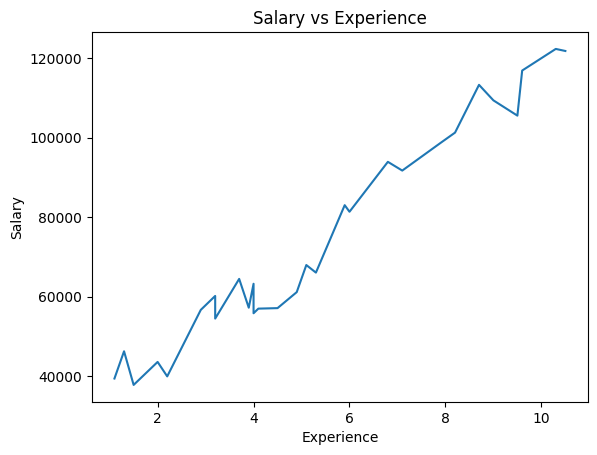

In [10]:
plt.plot(x,y)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

From here, we can observe that there is a direct relationship between salary and experience. So, lets make use of this relation and make a linear regression model from the same.

**Making training and testing data**

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

**Model Training**

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('Trained the model.')

Trained the model.


Now lets compare the model's prediction to the actual data graphically.

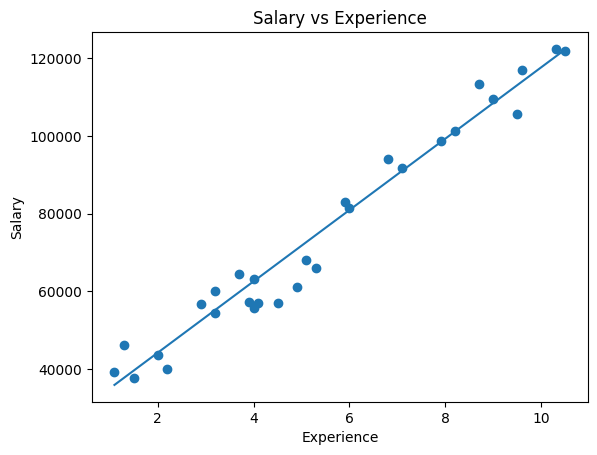

In [13]:
line=model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

The graph above shows that our predictions are nearly equal to the actual values of the data.

Now lets make a prediction for salary using the test data and compare the actual values with it to see how much the data differs from reality.

In [14]:
y_pred=model.predict(x_test)
y_pred

array([[ 39575.07453603],
       [ 91038.05836697],
       [105741.76803295],
       [ 67144.53015975],
       [ 62549.62088913],
       [113093.62286594]])

In [15]:
df=pd.DataFrame(data={'Predicted Values':y_test.flatten(),'Actual Values':y_pred.flatten()})
df

,Predicted Values,Actual Values
0,37731,39575.074536
1,91738,91038.058367
2,113338,105741.768033
3,57081,67144.530160
4,55789,62549.620889
5,105582,113093.622866


From here we can observe that the predicted values are close to the actual values this means our model was correct. Now lets calculate how much the data differs from the actual values by calculating Mean Absolute Error.

In [17]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

5746.003675155139

After changing the size of the train and test data sets I come to a conclusion that the minimum mean absolute error which can occur is of 5746.003675155139 currency units.

**We can use the above model to make prediction of salary of a person based on the years of experience. Lets try an example.**

In [18]:
# Let us assume that a person has experience of 5 years and calculate the salary.
exp=[[5]]
pred_sal=model.predict(exp)
print('The predicted salary for a person having experience of 5 years is ',pred_sal)

The predicted salary for a person having experience of 5 years is  [[71739.43943037]]
